In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('data/X_train.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [5]:
train_data_sub = train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
train_data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    384 non-null    int64  
 1   CoapplicantIncome  384 non-null    float64
 2   LoanAmount         384 non-null    int64  
 3   Loan_Amount_Term   384 non-null    int64  
 4   Credit_History     384 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 15.1 KB


### Credit_History là đơn vị nhị phân nên không cần chuẩn hóa
### Loan_Amount_Term đơn vị là tháng
### ApplicantIncome, CoapplicantIncome, LoanAmount có đơn vị là USD

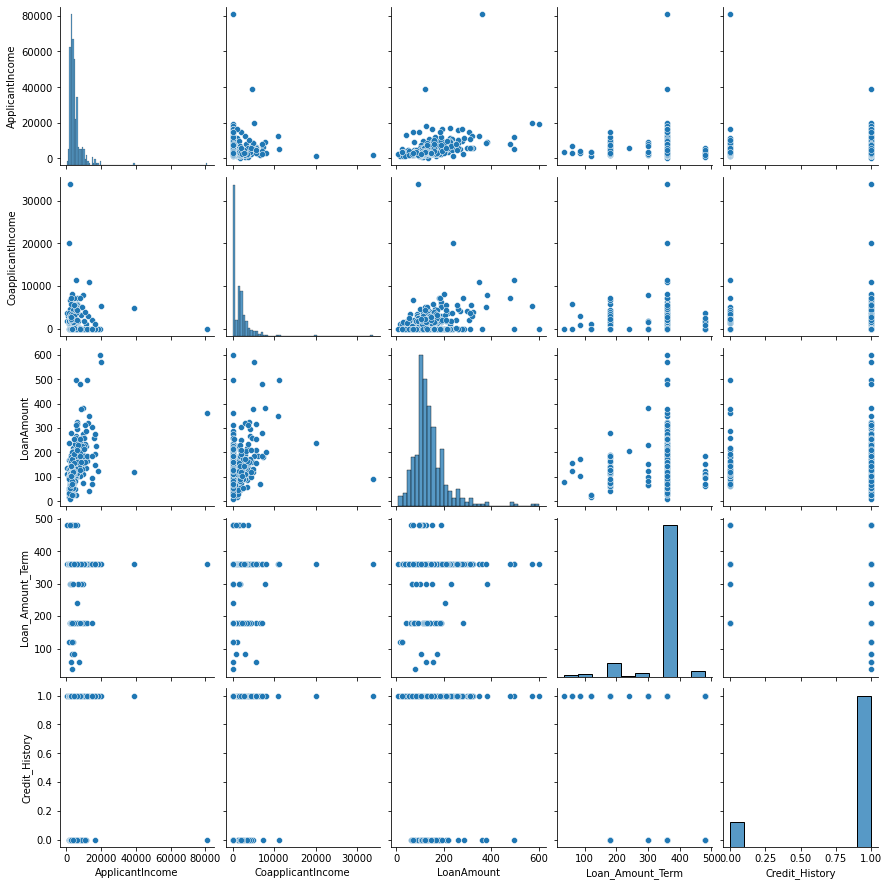

In [6]:
sns.pairplot(train_data_sub)

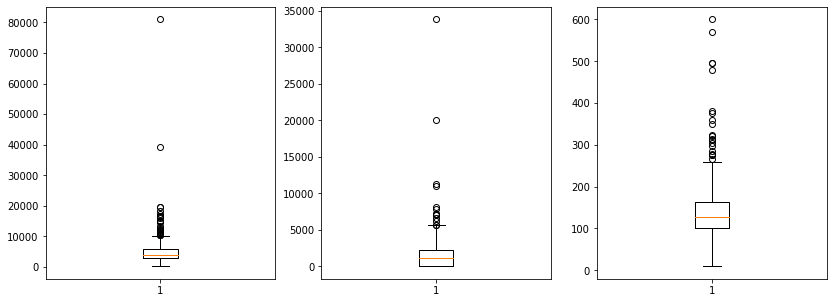

In [7]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.boxplot(train_data_sub.ApplicantIncome)
plt.subplot(1, 3, 2)
plt.boxplot(train_data_sub.CoapplicantIncome)
plt.subplot(1, 3, 3)
plt.boxplot(train_data_sub.LoanAmount)
plt.show()

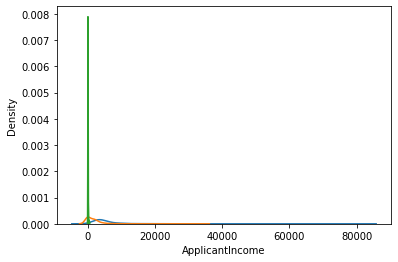

In [8]:
sns.kdeplot(train_data_sub.ApplicantIncome)
sns.kdeplot(train_data_sub.CoapplicantIncome)
sns.kdeplot(train_data_sub.LoanAmount)
plt.show()

### Dữ liệu không phân phối chuẩn => xem xét các outliers => sau đó chọn MinmaxScaler
### Cũng có thể dùng Robust Scaler nếu muốn giữ lại outliers

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
min_max = MinMaxScaler()
X_train_minmax = min_max.fit_transform(train_data_sub)

In [11]:
X_train_minmax[:4]

array([[0.0593692 , 0.        , 0.1962775 , 0.72972973, 1.        ],
       [0.03379097, 0.054467  , 0.1928934 , 1.        , 1.        ],
       [0.03525046, 0.10095458, 0.07952623, 0.32432432, 1.        ],
       [0.11815708, 0.        , 0.17428088, 0.72972973, 1.        ]])

In [12]:
df_train_minmax = pd.DataFrame(X_train_minmax, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
df_train_minmax.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.059369,0.000000,0.196277,0.729730,1.0
1,0.033791,0.054467,0.192893,1.000000,1.0
2,0.035250,0.100955,0.079526,0.324324,1.0
3,0.118157,0.000000,0.174281,0.729730,1.0
4,0.027001,0.071431,0.214890,0.729730,1.0


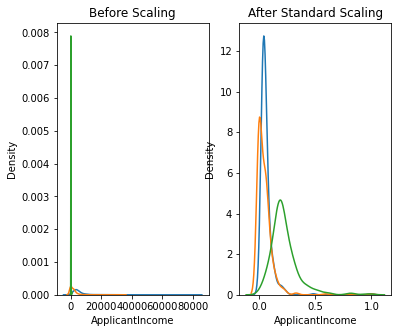

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(train_data_sub.ApplicantIncome, ax=ax1)
sns.kdeplot(train_data_sub.CoapplicantIncome, ax=ax1)
sns.kdeplot(train_data_sub.LoanAmount, ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(df_train_minmax.ApplicantIncome, ax=ax2)
sns.kdeplot(df_train_minmax.CoapplicantIncome, ax=ax2)
sns.kdeplot(df_train_minmax.LoanAmount, ax=ax2)

plt.show()